In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("train.csv")

Смотрим таргет и делаем log преобразование, чтобы избавиться от скошенности.

G:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


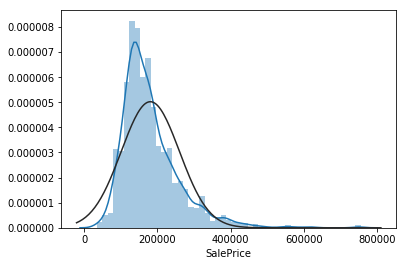

<Figure size 432x288 with 0 Axes>

In [5]:
import seaborn as sns
from scipy.stats import norm

sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
Y_train_int = train_data[['SalePrice']]
Y_train = np.log1p(train_data[['SalePrice']])

In [6]:
X_train = train_data.drop("Id", axis=1)
X_train['SalePrice'] = np.log1p(X_train['SalePrice'])
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024057
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399449
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775105
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474


Смотрим на типы данных

In [7]:
X_train.dtypes.value_counts()

object     43
int64      33
float64     4
dtype: int64

Выбираем числовые

In [8]:
X_train_non_ob = X_train.select_dtypes(exclude=['object'])

Смотрим мисссинги

In [9]:
X1=X_train_non_ob.melt()
X2=X1.groupby(['variable']).count()
X2.sort_values(by="value")

,value
variable,
LotFrontage,1201
GarageYrBlt,1379
MasVnrArea,1452
MSSubClass,1460
MiscVal,1460
MoSold,1460
OpenPorchSF,1460
OverallCond,1460
1stFlrSF,1460


Видно, что миссинги в переменных LotFrontage, GarageYrBlt, MasVnrArea. Заменим их на 0.

In [82]:
import warnings
warnings.filterwarnings("ignore")
X_train_non_ob['LotFrontage'] = X_train_non_ob['LotFrontage'].fillna(0)
X_train_non_ob['GarageYrBlt'] = X_train_non_ob['GarageYrBlt'].fillna(0)
X_train_non_ob['MasVnrArea'] = X_train_non_ob['MasVnrArea'].fillna(0)

Выбираем категориальные переменные

In [11]:
X_train_ob = X_train.select_dtypes(include=['object'])

Смотрим распределения частот

In [12]:
def frequency_table(x):
    return pd.crosstab(index=x, columns="count", normalize="all")

ctabs = {}
for column in X_train_ob:
    ctabs[column]=frequency_table(X_train_ob[column])

ctabs

{'MSZoning': col_0        count
 MSZoning          
 C (all)   0.006849
 FV        0.044521
 RH        0.010959
 RL        0.788356
 RM        0.149315, 'Street': col_0     count
 Street         
 Grvl    0.00411
 Pave    0.99589, 'Alley': col_0     count
 Alley          
 Grvl   0.549451
 Pave   0.450549, 'LotShape': col_0        count
 LotShape          
 IR1       0.331507
 IR2       0.028082
 IR3       0.006849
 Reg       0.633562, 'LandContour': col_0           count
 LandContour          
 Bnk          0.043151
 HLS          0.034247
 Low          0.024658
 Lvl          0.897945, 'Utilities': col_0         count
 Utilities          
 AllPub     0.999315
 NoSeWa     0.000685, 'LotConfig': col_0         count
 LotConfig          
 Corner     0.180137
 CulDSac    0.064384
 FR2        0.032192
 FR3        0.002740
 Inside     0.720548, 'LandSlope': col_0         count
 LandSlope          
 Gtl        0.946575
 Mod        0.044521
 Sev        0.008904, 'Neighborhood': col_0           

Можно удалить Utilities и Alley

In [13]:
X_train_ob = X_train_ob.drop(["Utilities", "Alley"], axis=1)

Смотрим миссинги

In [14]:
X1=X_train_ob.melt()
X2=X1.groupby(['variable']).count()
X2.sort_values(by="value")

,value
variable,
PoolQC,7
MiscFeature,54
Fence,281
FireplaceQu,770
GarageQual,1379
GarageType,1379
GarageFinish,1379
GarageCond,1379
BsmtExposure,1422


Видно, что миссинги содержат PoolQC,MiscFeature, Fence, FireplaceQu, GarageType, GarageFinish, GarageCond, GarageQual, 
BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual, BsmtFinType1, MasVnrType, Electrical. Заменяем на категорию NA и моду.

In [15]:
X_train_ob['PoolQC'] = X_train_ob['PoolQC'].fillna('NA')
X_train_ob['MiscFeature'] = X_train_ob['MiscFeature'].fillna('NA')
X_train_ob['Fence'] = X_train_ob['Fence'].fillna('NA')
X_train_ob['FireplaceQu'] = X_train_ob['FireplaceQu'].fillna('NA')
X_train_ob['GarageType'] = X_train_ob['GarageType'].fillna('NA')
X_train_ob['GarageFinish'] = X_train_ob['GarageFinish'].fillna('NA')
X_train_ob['GarageCond'] = X_train_ob['GarageCond'].fillna('NA')
X_train_ob['GarageQual'] = X_train_ob['GarageQual'].fillna('NA')
X_train_ob['BsmtExposure'] = X_train_ob['BsmtExposure'].fillna('NA')
X_train_ob['BsmtFinType2'] = X_train_ob['BsmtFinType2'].fillna('NA')
X_train_ob['BsmtCond'] = X_train_ob['BsmtCond'].fillna('NA')
X_train_ob['BsmtQual'] = X_train_ob['BsmtQual'].fillna('NA')
X_train_ob['BsmtFinType1'] = X_train_ob['BsmtFinType1'].fillna('NA')
X_train_ob['MasVnrType'] = X_train_ob['MasVnrType'].fillna('NA')
X_train_ob['Electrical'] = X_train_ob['Electrical'].fillna(X_train_ob['Electrical'].mode()[0])

Преобразовываем в dummy-переменные

In [16]:
X_train_obj_dummy = pd.get_dummies(X_train_ob)
X_train_obj_dummy.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


Полный массив обучающих переменных

In [17]:
X_train_defor = pd.concat([X_train_non_ob, X_train_obj_dummy], axis=1)
X_train_defor = X_train_defor.drop("SalePrice", axis=1)
list(X_train_defor)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blues

Отбираем переменные с помощью L1

In [67]:
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel

lsvc = linear_model.Lasso(alpha = 0.1).fit(X_train_defor, Y_train.values.ravel())
model = SelectFromModel(lsvc, prefit=True)
feature_name_L1 = X_train_defor.columns[model.get_support()]
X_train_defor[feature_name_L1].count()

MSSubClass       1460
LotFrontage      1460
YearBuilt        1460
YearRemodAdd     1460
MasVnrArea       1460
BsmtFinSF1       1460
BsmtFinSF2       1460
TotalBsmtSF      1460
1stFlrSF         1460
2ndFlrSF         1460
GrLivArea        1460
GarageYrBlt      1460
GarageArea       1460
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
3SsnPorch        1460
ScreenPorch      1460
PoolArea         1460
dtype: int64

Отбираем переменные с помощью деревьев

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X_train_defor, Y_train_int.values.ravel())
model = SelectFromModel(clf, prefit=True)
feature_name_TR = X_train_defor.columns[model.get_support()]
X_train_defor[feature_name_TR].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_NA,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,1,0,0,1,1,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,1,0,0,1,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,0,0,1,0,0,1,1,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,1,0,0,1,0,1,1,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,0,0,1,0,0,1,1,0,1


Отбираем переменные с помощью корреляции

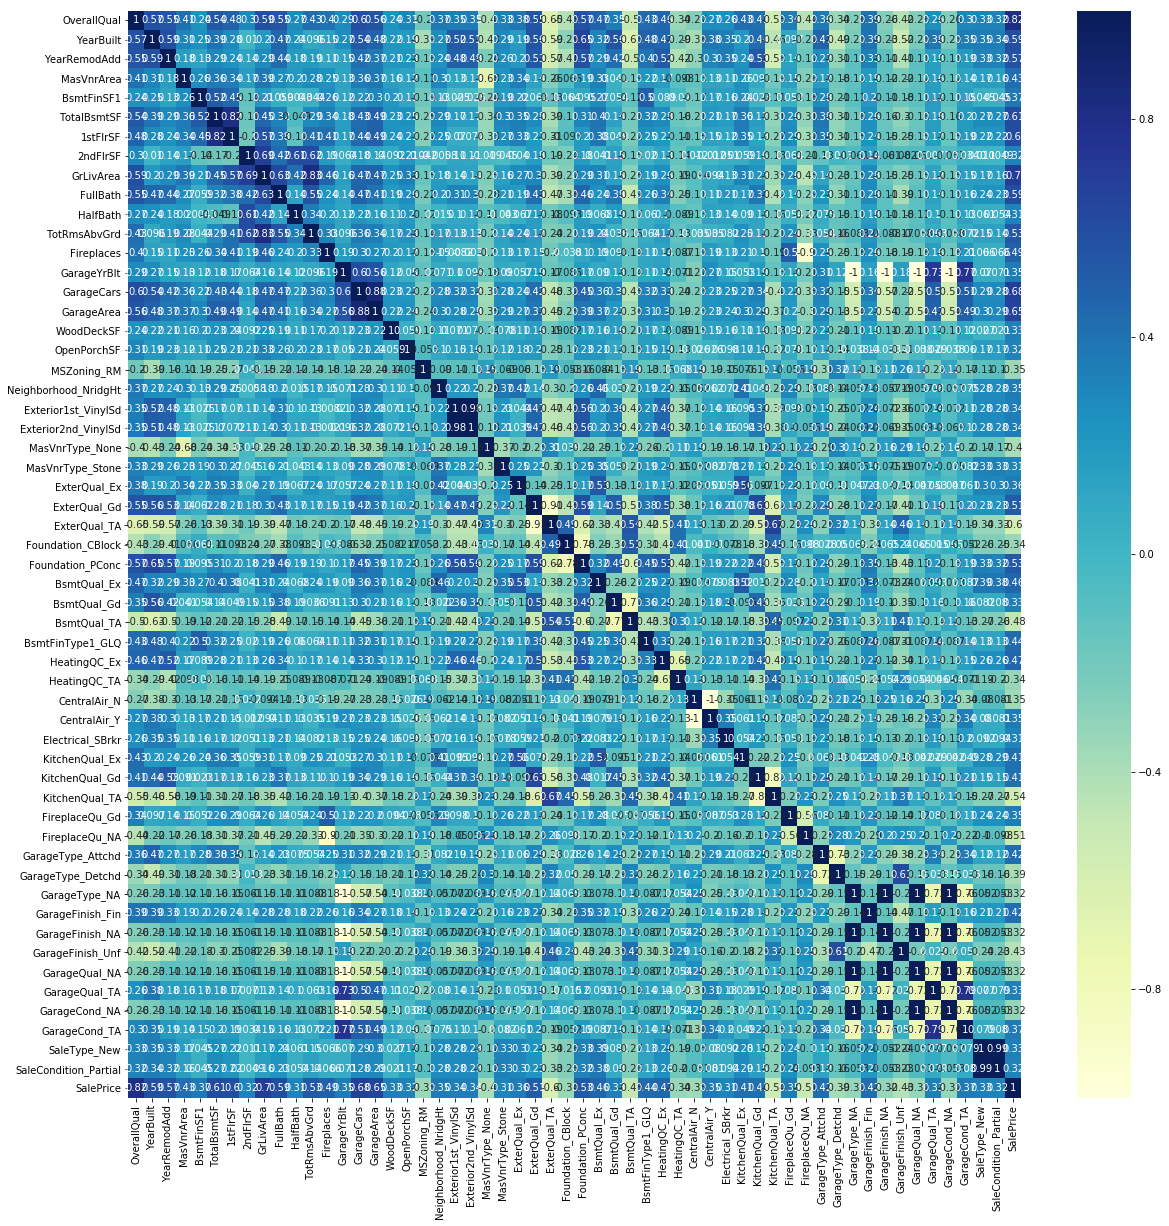

In [21]:
import seaborn as sns
X_train_temp = pd.concat([X_train_defor, Y_train], axis=1)
corrmat = X_train_temp.corr()
top_corr_features = corrmat.index[abs(corrmat['SalePrice'])>0.30]
plt.figure(figsize=(20,20))
g = sns.heatmap(X_train_temp[top_corr_features].corr(),annot=True,cmap="YlGnBu")
X_train_temp = X_train_temp[top_corr_features]

In [22]:
corr = X_train_temp.corr()
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs()>0.6).any()
feature_name_COR = list(X_train_temp[corr.loc[m,m].columns.values])
X_train_defor[feature_name_COR].head()

,YearRemodAdd,BsmtFinSF1,WoodDeckSF,OpenPorchSF,MSZoning_RM,Neighborhood_NridgHt,MasVnrType_Stone,ExterQual_Ex,BsmtQual_Ex,BsmtFinType1_GLQ,Electrical_SBrkr,KitchenQual_Ex,FireplaceQu_Gd,GarageFinish_Fin
0,2003,706,0,61,0,0,0,0,0,1,1,0,0,0
1,1976,978,298,0,0,0,0,0,0,0,1,0,0,0
2,2002,486,0,42,0,0,0,0,0,1,1,0,0,0
3,1970,216,0,35,0,0,0,0,0,0,1,0,1,0
4,2000,655,192,84,0,0,0,0,0,1,1,0,0,0


Функция, которая делит на фолды и считает метрику rmse

In [23]:
from sklearn.model_selection import KFold, cross_val_score


n_folds = 8

def rmsle_cv(model, train):
    kf = KFold(n_folds, shuffle=True, random_state=88).get_n_splits(train.values)
    rmsle= np.sqrt(-cross_val_score(model, train.values, Y_train.values.ravel(), scoring="neg_mean_squared_error", cv = kf))
    return(rmsle)

Первая модель - линейная регрессия и три набора признаков. 

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

model_LinReg = LinearRegression()
model_LinReg.fit(X_train_defor[feature_name_L1], Y_train)
score = rmsle_cv(model_LinReg, X_train_defor[feature_name_L1])
print(score.mean(), score.std())

model_LinReg.fit(X_train_defor[feature_name_TR], Y_train)
score = rmsle_cv(model_LinReg, X_train_defor[feature_name_TR])
print(score.mean(), score.std())

model_LinReg.fit(X_train_defor[feature_name_COR], Y_train)
score = rmsle_cv(model_LinReg, X_train_defor[feature_name_COR])
print(score.mean(), score.std())

0.16386400819544503 0.038350332280294636
0.1477128276317527 0.03541273871558964
0.24876076614460382 0.028949126944883607


In [33]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=25)
model_rf.fit(X_train_defor[feature_name_L1], Y_train.values.ravel())
score = rmsle_cv(model_rf, X_train_defor[feature_name_L1])
print(score.mean(), score.std())
model_rf.fit(X_train_defor[feature_name_TR], Y_train.values.ravel())
score = rmsle_cv(model_rf, X_train_defor[feature_name_TR])
print(score.mean(), score.std())
model_rf.fit(X_train_defor[feature_name_COR], Y_train.values.ravel())
score = rmsle_cv(model_rf, X_train_defor[feature_name_COR])
print(score.mean(), score.std())

0.16572104790587186 0.01584652115456261
0.14682469109387222 0.016915340506845514
0.2533930273872758 0.02386264760713596


In [93]:
from sklearn.ensemble import   GradientBoostingRegressor
model_GBoost = GradientBoostingRegressor(learning_rate=0.05,
                                   max_depth=4, min_samples_leaf=10, 
                                   loss='huber', random_state = 8)
model_GBoost.fit(X_train_defor[feature_name_L1], Y_train.values.ravel())
score = rmsle_cv(model_GBoost, X_train_defor[feature_name_L1])
print(score.mean(), score.std())
model_GBoost.fit(X_train_defor[feature_name_TR], Y_train.values.ravel())
score = rmsle_cv(model_GBoost, X_train_defor[feature_name_TR])
print(score.mean(), score.std())
model_GBoost.fit(X_train_defor[feature_name_COR], Y_train.values.ravel())
score = rmsle_cv(model_GBoost, X_train_defor[feature_name_COR])
print(score.mean(), score.std())

0.16414878948228206 0.015291898098056126
0.13709856041627316 0.01938320419074581
0.2353895217953379 0.02248391979850981


В качестве итогового скора возьмем среднее значение между результатами линейной регрессии и 
градиентного бустинга по 2 набору данных

In [96]:
model_LinReg.fit(X_train_defor[feature_name_TR], Y_train.values.ravel())
model_GBoost.fit(X_train_defor[feature_name_TR], Y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=8, subsample=1.0, verbose=0,
             warm_start=False)

In [85]:
test_data = pd.read_csv("test.csv")
test_Id = test_data['Id']

преобразование переменных в тесте

In [89]:
test_data_non_ob = test_data.select_dtypes(exclude=['object'])
test_data_non_ob['LotFrontage'] = test_data_non_ob['LotFrontage'].fillna(0)
test_data_non_ob['GarageYrBlt'] = test_data_non_ob['GarageYrBlt'].fillna(0)
test_data_non_ob['MasVnrArea'] = test_data_non_ob['MasVnrArea'].fillna(0)
test_data_ob = test_data.select_dtypes(include=['object'])
test_data_ob['PoolQC'] = test_data_ob['PoolQC'].fillna('NA')
test_data_ob['MiscFeature'] = test_data_ob['MiscFeature'].fillna('NA')
test_data_ob['Fence'] = test_data_ob['Fence'].fillna('NA')
test_data_ob['FireplaceQu'] = test_data_ob['FireplaceQu'].fillna('NA')
test_data_ob['GarageType'] = test_data_ob['GarageType'].fillna('NA')
test_data_ob['GarageFinish'] = test_data_ob['GarageFinish'].fillna('NA')
test_data_ob['GarageCond'] = test_data_ob['GarageCond'].fillna('NA')
test_data_ob['GarageQual'] = test_data_ob['GarageQual'].fillna('NA')
test_data_ob['BsmtExposure'] = test_data_ob['BsmtExposure'].fillna('NA')
test_data_ob['BsmtFinType2'] = test_data_ob['BsmtFinType2'].fillna('NA')
test_data_ob['BsmtCond'] = test_data_ob['BsmtCond'].fillna('NA')
test_data_ob['BsmtQual'] = test_data_ob['BsmtQual'].fillna('NA')
test_data_ob['BsmtFinType1'] = test_data_ob['BsmtFinType1'].fillna('NA')
test_data_ob['MasVnrType'] = test_data_ob['MasVnrType'].fillna('NA')
test_data_ob['Electrical'] = test_data_ob['Electrical'].fillna(test_data_ob['Electrical'].mode()[0])
test_data_ob_dummy = pd.get_dummies(test_data_ob)
X_test_defor = pd.concat([test_data_non_ob, test_data_ob_dummy], axis=1)
X_test_defor['BsmtFinSF1'] = X_test_defor['BsmtFinSF1'].fillna(0)
X_test_defor['BsmtFinSF2'] = X_test_defor['BsmtFinSF2'].fillna(0)
X_test_defor['BsmtUnfSF'] = X_test_defor['BsmtUnfSF'].fillna(0)
X_test_defor['TotalBsmtSF'] = X_test_defor['TotalBsmtSF'].fillna(0)
X_test_defor['BsmtFullBath'] = X_test_defor['BsmtFullBath'].fillna(0)
X_test_defor['GarageCars'] = X_test_defor['GarageCars'].fillna(0)
X_test_defor['GarageArea'] = X_test_defor['GarageArea'].fillna(0)
X_test_defor['BsmtHalfBath'] = X_test_defor['BsmtHalfBath'].fillna(0)

In [98]:
forecast1 = np.expm1(model_LinReg.predict(X_test_defor[feature_name_TR])).ravel() 
forecast2 = np.expm1(model_GBoost.predict(X_test_defor[feature_name_TR])).ravel()
final_forecast = (forecast1 + forecast2)/2

In [99]:
test_data = pd.read_csv("test.csv")
test_Id = test_data['Id']

sub = pd.DataFrame()
sub['Id'] = test_Id.ravel()
sub['SalePrice'] = final_forecast
sub.to_csv('submission.csv',index=False)

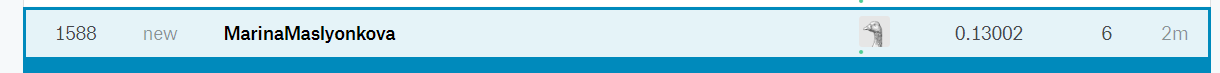

In [81]:
from IPython.display import Image
Image("leaderboard.png")

В качестве итогового скора была взята линейная комбинация моделей линейной регрессии и градинентного бустинга с равными весами. В качестве алгоритма для отбора переменных был выборан ExtraTreesClassifier (таргет как категориальная переменная). Этот алгорим отобрал бОльшее кол-во признаков, по сравнению с остальными двумя. 